# Лабораторная работа 2.1.6

# Эффект Джоуля-Томсона

## Теория

Используя уравнение состояния Ван-дер-Ваальса, найдем коэффициент Джоуля-Томсона:
$$ \mu_{J-T}= \frac{\Delta T}{\Delta P} \approx \frac 1 {C_p} \Bigr(\frac{2a}{RT}-b \Bigl)\ \ \ (1)$$ 
Отсюда температура инверсии (при которой эффект нулевой):
$$ T_i=\frac{2a}{Rb} $$
Построив график зависимости $ \mu_{J-T}\Bigr(\frac 1 T\Bigl) $, определим $a$ и $b$

In [2]:
import numpy as np
import pandas as pd
import labhelper as lh
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Измерения

Будем снимать 6 точек при понижении давления для каждого значения температуры. По показаниям вольтметра определим температуру, используя калибровочную кривую термопары.

In [3]:
data = pd.read_csv('data.tsv', delimiter='\t')
data['$\\Delta T_1, K$'] = round(data['$U_1, \mu V$']/40.2, 2)
data['$\\Delta T_2, K$'] = round(data['$U_2, \mu V$']/42.5, 2)
data['$\\Delta T_3, K$'] = round(data['$U_3, \mu V$']/44.1, 2)
data

,"$\Delta P_1, bar$","$U_1, \mu V$","$\Delta P_2, bar$","$U_2, \mu V$","$\Delta P_3, bar$","$U_3, \mu V$","$\Delta T_1, K$","$\Delta T_2, K$","$\Delta T_3, K$"
0,4.10,163,4.05,137,4.09,113,4.05,3.22,2.56
1,3.54,137,3.64,121,3.71,100,3.41,2.85,2.27
2,3.11,118,3.11,101,3.34,88,2.94,2.38,2.00
3,2.69,100,2.44,76,2.95,75,2.49,1.79,1.70
4,2.21,79,1.99,59,2.50,60,1.97,1.39,1.36
5,1.88,65,1.60,46,2.16,49,1.62,1.08,1.11


## Обработка данных

Построим 3 графика зависимости $\Delta T(\Delta P)$, из которых определим коэффициенты Джоуля-Томсона для каждой из температур.

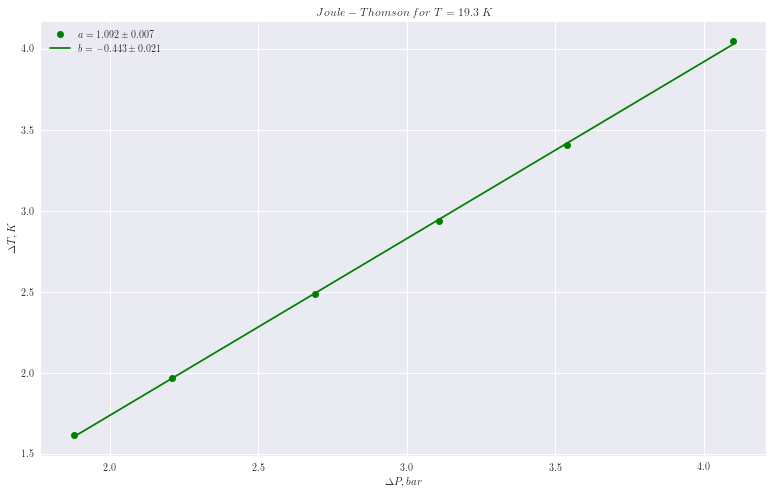

In [7]:
lh.linear(data['$\Delta P_1, bar$'], data['$\\Delta T_1, K$'], xlabel='$\\Delta P, bar$', 
          ylabel='$\\Delta T, K$', title='$Joule-Thomson\ for\ T = 19.3\ K$')

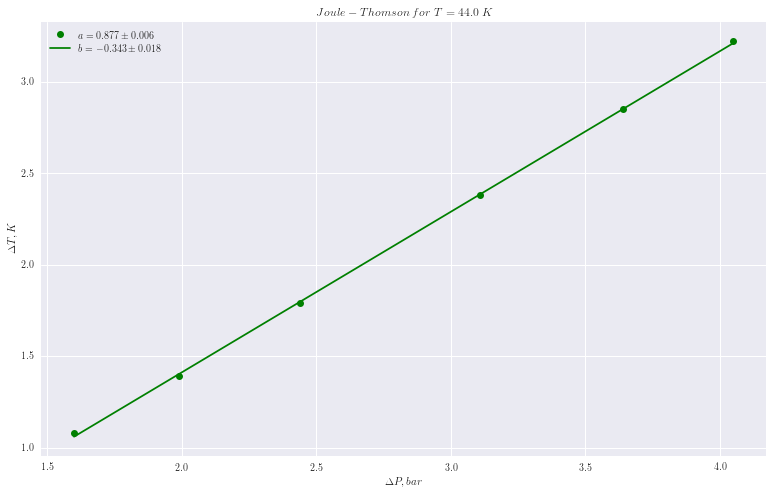

In [8]:
lh.linear(data['$\Delta P_2, bar$'], data['$\\Delta T_2, K$'], xlabel='$\\Delta P, bar$', 
          ylabel='$\\Delta T, K$', title='$Joule-Thomson\ for\ T = 44.0\ K$')

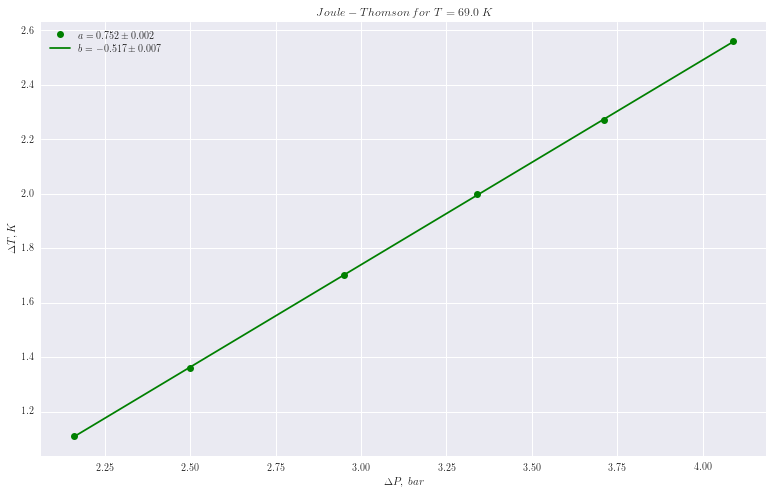

In [9]:
lh.linear(data['$\Delta P_3, bar$'], data['$\\Delta T_3, K$'], xlabel='$\\Delta P,\ bar$', 
          ylabel='$\\Delta T, K$', title='$Joule-Thomson\ for\ T = 69.0\ K$')

In [18]:
inv = pd.read_csv('inv.tsv', delimiter='\t')
inv['$T^{-1}, K^{-1}$'] = 1.0/(inv['$T, C$']+273)
inv

,"$T, C$","$\mu_{J-T}, K\cdot bar^{-1}$","$T^{-1}, K^{-1}$"
0,19.3,1.09,0.003421
1,44.0,0.88,0.003155
2,69.0,0.75,0.002924


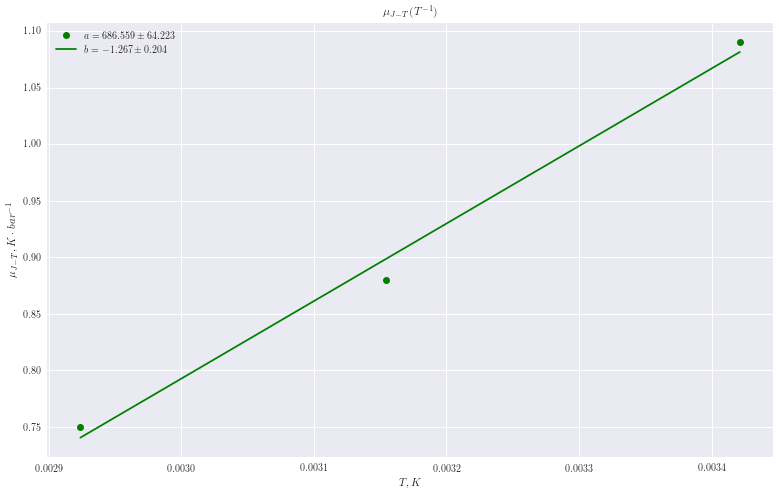

In [19]:
lh.linear(inv['$T^{-1}, K^{-1}$'], inv['$\mu_{J-T}, K\cdot bar^{-1}$'], xlabel='$T, K$', ylabel='$\mu_{J-T}, K\cdot bar^{-1}$', title='$\\mu_{J-T}(T^{-1})$')

Используя коэффициенты, полученные из графика и формулу $(1)$, получаем:
$$ a = (0.83\,\pm\,0.08)\ Pa\cdot m^6 $$
$$ b = (3.7\,\pm\,0.6)\cdot 10^{-4}\ m^3 $$
Температура инверсии тогда:
$$ T_i=\frac{2a}{Rb}=(540\,\pm\,100)\ K $$
Значит критическая температура равна
$$ T_c = \frac 4 {27} T_i=(80\,\pm\,15)\ K $$

## Выводы

Значения не совпадают с теоретическими $a^{th}=0.36\ Pa\cdot m^6$, $b^{th}=0.4\cdot 10^{-4}\ m^3$. Это можно объяснить тем, что уравнение Ван-дер-Ваальса плохо описывает газ в данном диапазоне температур и давлений.